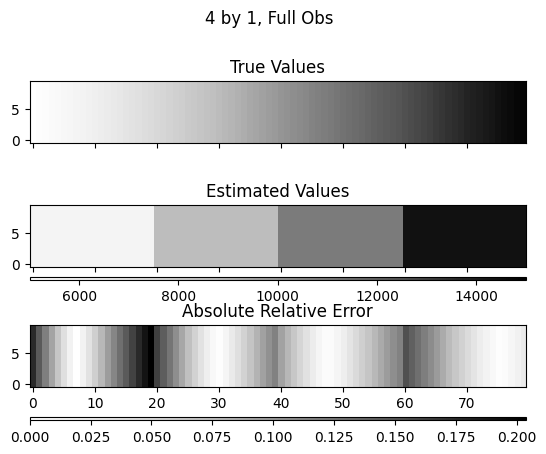

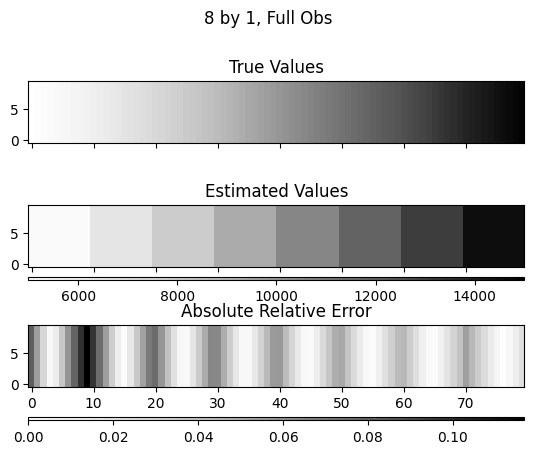

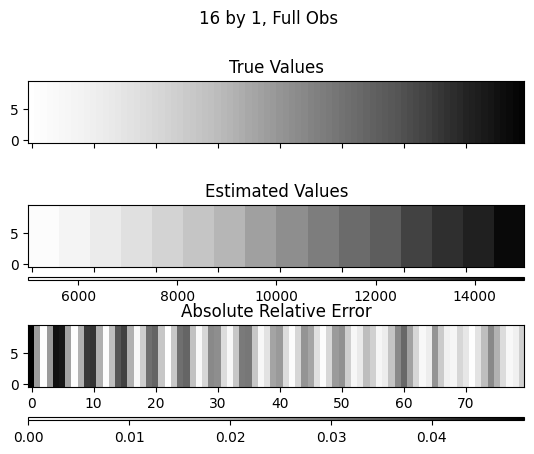

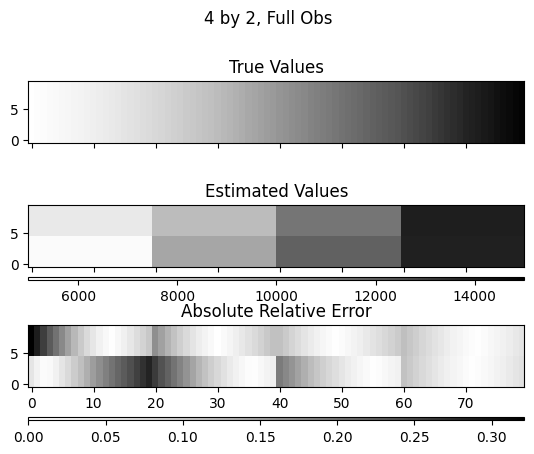

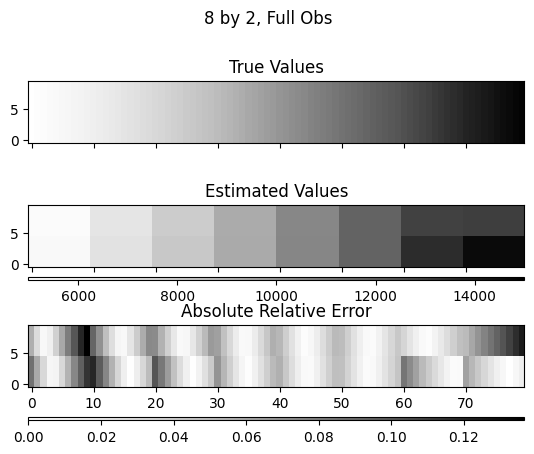

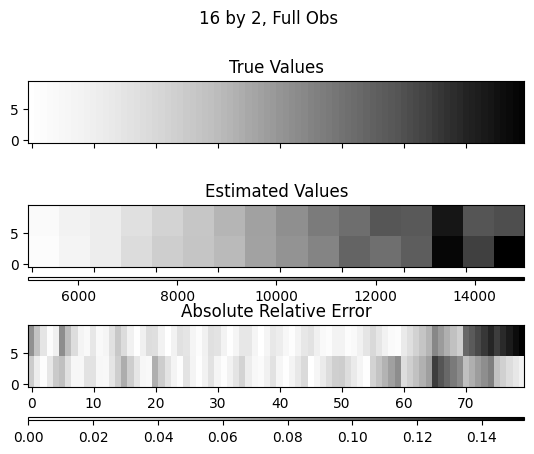

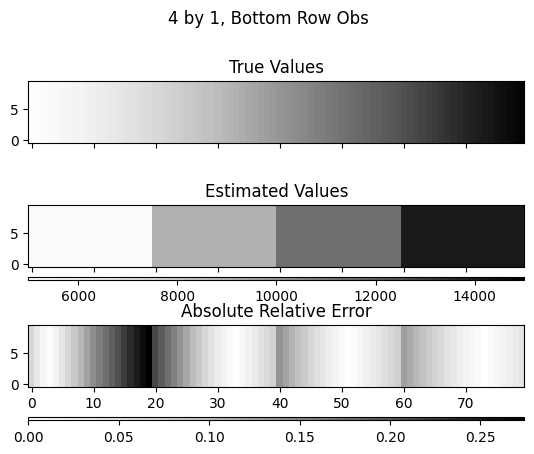

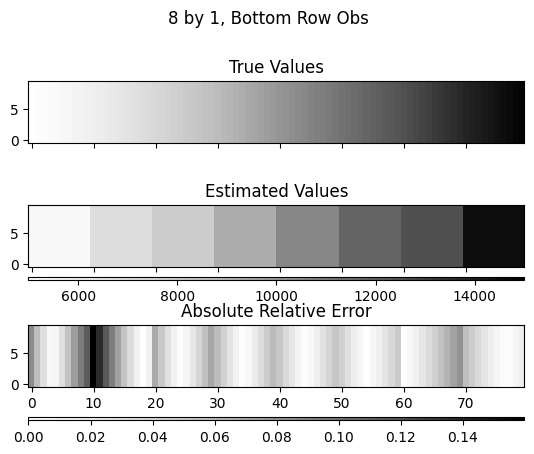

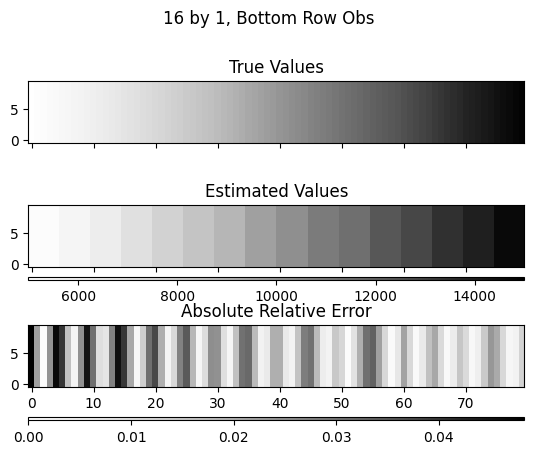

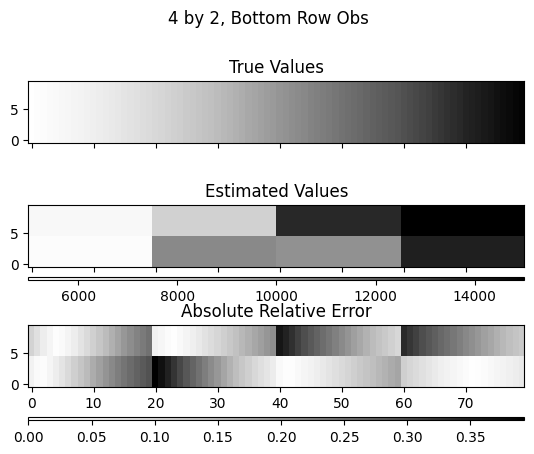

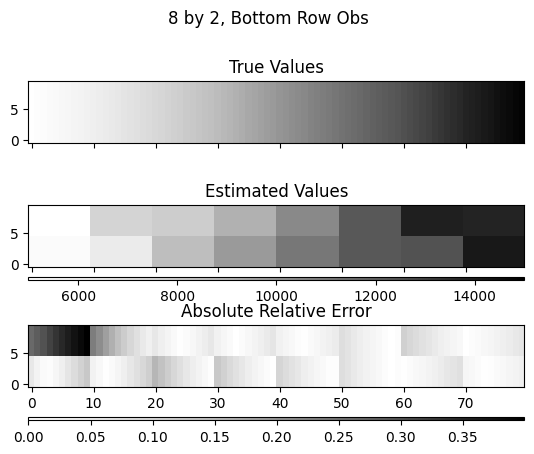

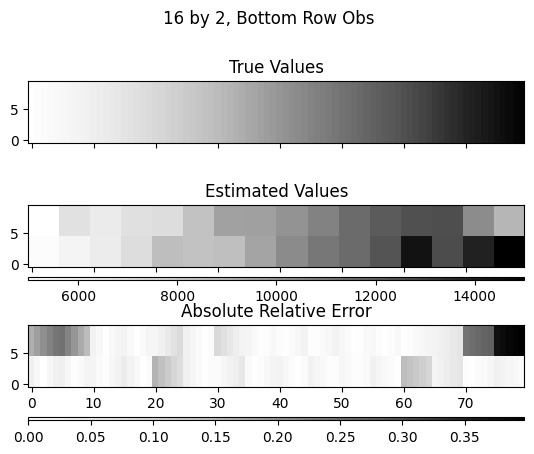

In [14]:
import json, os, re
import numpy as np
import matplotlib.pyplot as plt
import einops
from mpl_toolkits.axes_grid1 import make_axes_locatable

directory_path = "."  # Replace with your desired directory path

files = os.listdir(directory_path)

filenames = [s for s in files if s.endswith('.json')]
file_index = [5,9,1,7,11,3,4,8,0,6,10,2]
filenames_reordered = [filenames[i] for i in file_index]
filenames = filenames_reordered
pattern = r"result_(\d+)_(\d+)_init"

E_hists = []
results = []
avg_err = []


Nx = 80
Ny = 10
n_particles = Nx * Ny
E_true = np.zeros(n_particles)

for i in range(n_particles):
    col = i % Nx
    E_true[i] = 5000 + 10000*(col / Nx)


for name in filenames:
    with open(name) as json_file:
        result = json.load(json_file)['E_hist'][-1]        
    
    results.append(result)

    match = re.search(pattern, name)
    n_blocks_x = int(match.group(1))
    n_blocks_y = int(match.group(2))

    n_blocks = n_blocks_y * n_blocks_x
    block_nx = int(Nx / n_blocks_x)
    block_ny = int(Ny / n_blocks_y)

    if name[-9:-5] == 'full':
        obs = 'Full Obs'
    else:
        obs = 'Bottom Row Obs'

    E = np.zeros(n_particles)
    for i in range(Nx):
        for j in range(Ny):
            block_index_x = i // block_nx
            block_index_y = j // block_ny
            E[j*Nx+i] = result[block_index_x + block_index_y * n_blocks_x]

    E_true_reshape = einops.rearrange(E_true, "(y x) -> x y", y=Ny)
    E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
    error = np.abs(np.divide((E_reshape - E_true_reshape), E_true_reshape))
    avg_err.append(np.mean(error.flatten()))

    fig, axs = plt.subplots(3, sharex=True, sharey=True)
    fig.suptitle(str(n_blocks_x) + ' by ' + str(n_blocks_y) + ", " + obs)
    axs[0].imshow(E_true_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[0].set_title('True Values')
    
    im1 = axs[1].imshow(E_reshape.transpose(), origin='lower', cmap='Greys', vmin=5000, vmax = 15000)
    axs[1].set_title('Estimated Values')
    divider1 = make_axes_locatable(axs[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.1)
    fig.colorbar(im1, cax=cax1, orientation='horizontal')

    im2 = axs[2].imshow(error.transpose(), origin='lower', cmap='Greys', vmin=0)
    axs[2].set_title('Absolute Relative Error')
    divider2 = make_axes_locatable(axs[2])
    cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
    fig.colorbar(im2, cax=cax2, orientation='horizontal')
    plt.show()
    

    


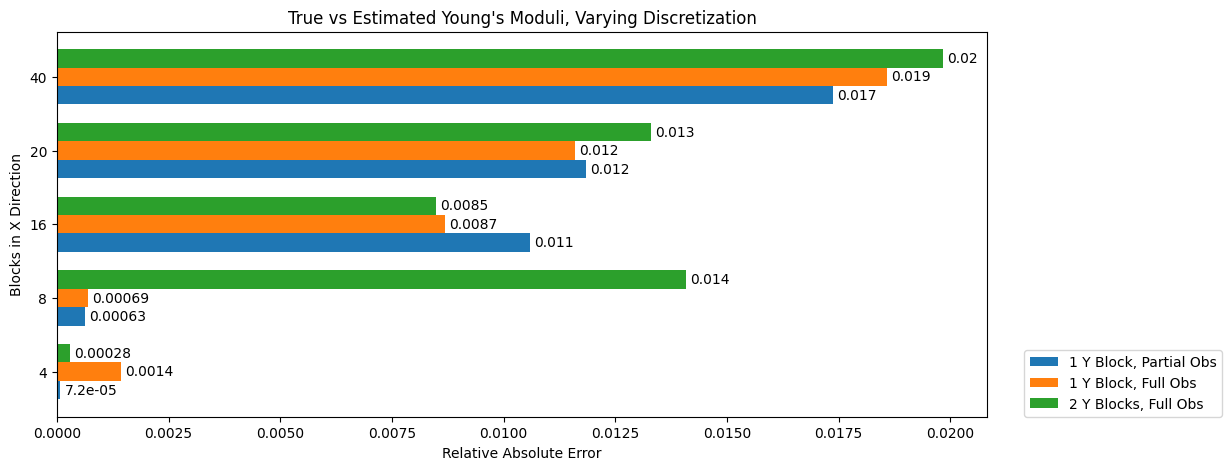

In [118]:
i_1 = [4,8,0]
i_1_full = [5,9,1]
i_2_full = [7,11,3]
i_2 = [6,10,2]

species = ("4", "8", "16")
penguin_means = {
    '1 Y Block, Partial Obs': [avg_err[i] for i in i_1],
    '1 Y Block, Full Obs': [avg_err[i] for i in i_1_full],
    '2 Y Blocks, Full Obs': [avg_err[i] for i in i_2_full],
    '2 Y Blocks, Partial Obs':[avg_err[i] for i in i_2],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,5))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.2g')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Absolute Error')
ax.set_title('True vs Estimated Young\'s Moduli, Varying Discretization')
ax.set_yticks(x + width, species)
ax.legend(loc=(1.04,0))
# ax.set_ylim(0, 250)
ax.set_ylabel('Blocks in X Direction')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np

snrs = [
    '10'
    ]

for snr in snrs:
    snr_num = float(snr) 

    filenames = [
        'result_db_' + snr + '_init_12e4.json',
        'result_db_' + snr + '_init_1e3.json',
    ]
    results = []
   
   
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["High", "Low"]
    
    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4

        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')


10.0 dB noise convergence error(Highstart:  0.15412247990018776 %
10.0 dB noise convergence error(Lowstart:  0.2220248586906288 %


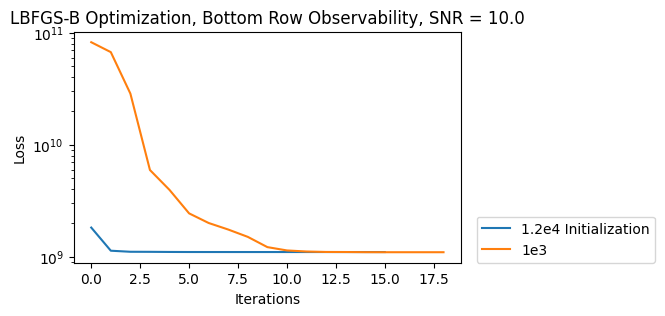

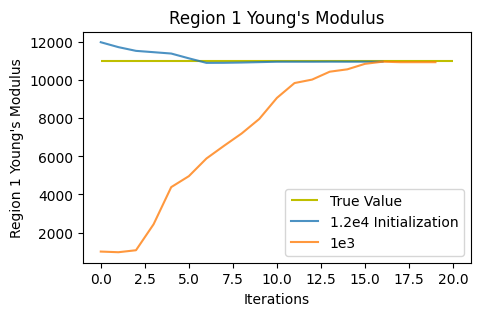

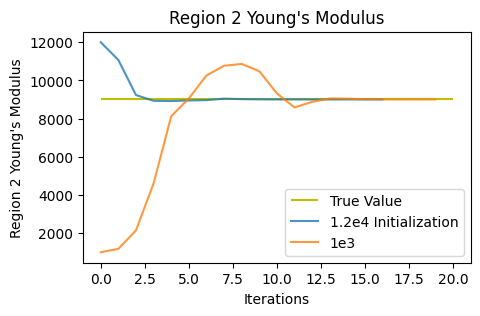

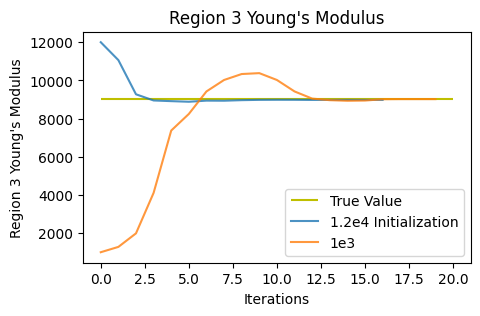

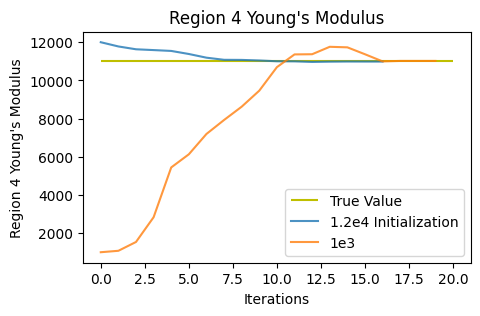

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np

snrs = [
    '10'
    ]

for snr in snrs:
    snr_num = float(snr) 

    filenames = [
        'result_db_' + snr + '_init_12e4.json',
        'result_db_' + snr + '_init_1e3.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["High", "Low"]
    
    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4

        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')

for snr in snrs:

    snr_num = float(snr)

    filenames = [
        'result_db_' + snr + '_init_12e4.json',
        'result_db_' + snr + '_init_1e3.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)




    keys = ["E1", "E2", "E3", "E4"]
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    scale = [1, 1, 1, 1, 1, 1]
    labels = ['1.2e4 Initialization',
            '1e3', 
            '1e3',
            '1e3',
            '2e4',
            '8 particles, $\epsilon_{xx}$']
    colors = []

    plt.figure(figsize=(5,3))
    plt.title("LBFGS-B Optimization, Bottom Row Observability, SNR = " + str(snr_num))
    plt.ylabel("Loss")
    plt.yscale('log')
    plt.xlabel("Iterations")
    for j, result in enumerate(results):
        plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
    plt.legend(loc=(1.04,0))
    plt.yscale('log')
    plt.show()

    regions = ['Region 1 Young\'s Modulus',
            'Region 2 Young\'s Modulus',
                'Region 3 Young\'s Modulus', 
                'Region 4 Young\'s Modulus']
    for i, key in enumerate(keys):
        max_its = max([len(result[key]) for key in keys])
        plt.figure(figsize=(5,3))
        plt.title(regions[i])
        plt.ylabel(regions[i])
        plt.xlabel("Iterations")
        plt.hlines(Es[i], 0, max_its, color='y', label='True Value')
        for j, result in enumerate(results):
            plt.plot(result[key], alpha=0.8, label=labels[j])
        plt.legend()
        plt.show()
